# Linear regression using Scikit-learn
This notebook implements a simple linear regression using the library scikit-learn and the Boston dataset included in this library. This dataset contains data about the housing and price information in the Boston area in 70s. The dataset is maintained by Carnegie Mellon University.

## 1 - Preparing the dataset
In this section we will load and prepare the dataset to be used in subsequent steps.

In [20]:
#!conda install --yes matplotlib
#!conda install --yes pandas
#!conda install --yes numpy
#!conda install --yes scikit-learn=1.1

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#from sklearn.datasets import load_boston
#dataset = load_boston()

import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data"
column_names = [
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", 
    "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"
]

# Load the dataset into a DataFrame
dataset = pd.read_csv(url, delim_whitespace=True, names=column_names)

Printing the dataset

In [21]:
print(dataset)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273.0   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273.0   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273.0   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273.0   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273.0   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14

Printing the features names

In [22]:
print(dataset.columns)

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')


Printing the information regarding the Boston dataset

In [23]:
description = """
Variables
There are 14 attributes in each case of the dataset. They are:
CRIM - per capita crime rate by town
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS - proportion of non-retail business acres per town.
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX - nitric oxides concentration (parts per 10 million)
RM - average number of rooms per dwelling
AGE - proportion of owner-occupied units built prior to 1940
DIS - weighted distances to five Boston employment centres
RAD - index of accessibility to radial highways
TAX - full-value property-tax rate per $10,000
PTRATIO - pupil-teacher ratio by town
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT - % lower status of the population
MEDV - Median value of owner-occupied homes in $1000's

Note: description extracted from: https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html"""
print(description)


Variables
There are 14 attributes in each case of the dataset. They are:
CRIM - per capita crime rate by town
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS - proportion of non-retail business acres per town.
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX - nitric oxides concentration (parts per 10 million)
RM - average number of rooms per dwelling
AGE - proportion of owner-occupied units built prior to 1940
DIS - weighted distances to five Boston employment centres
RAD - index of accessibility to radial highways
TAX - full-value property-tax rate per $10,000
PTRATIO - pupil-teacher ratio by town
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT - % lower status of the population
MEDV - Median value of owner-occupied homes in $1000's

Note: description extracted from: https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html


Printing the target values (price of the houses)

In [24]:
output = dataset['MEDV']
print(output)

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64


Simple plot showing the values of the target (dependent variable)

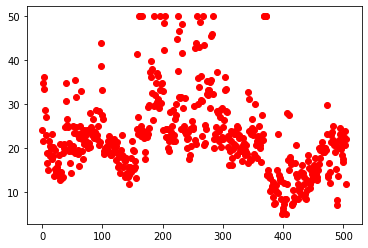

In [25]:
plt.plot(output, 'ro')

We can print the information regarding this dataframe. As we can see, there are 506 entries (sample instances) and all of them are numeric. Therefore, we do not need to perform any transformation. Notice that sklearn only works with numeric values and string values must be encoded.

In [26]:
# Renaming the target variable
dataset = dataset.rename(columns={"MEDV": "OUTPUT"})

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  OUTPUT   506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


We can also check if there are missing values in the dataset as follows (which is not the case, as shown above and below):

In [27]:
print(dataset.isnull().sum())

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
OUTPUT     0
dtype: int64


## 2 - Feature selection
In this section we will performed a very basic feature selection process to simplify the visual representation of the linear regression. To that end, we will check the correlation between independent variables (housing characteristics) and the dependent variable (house price)

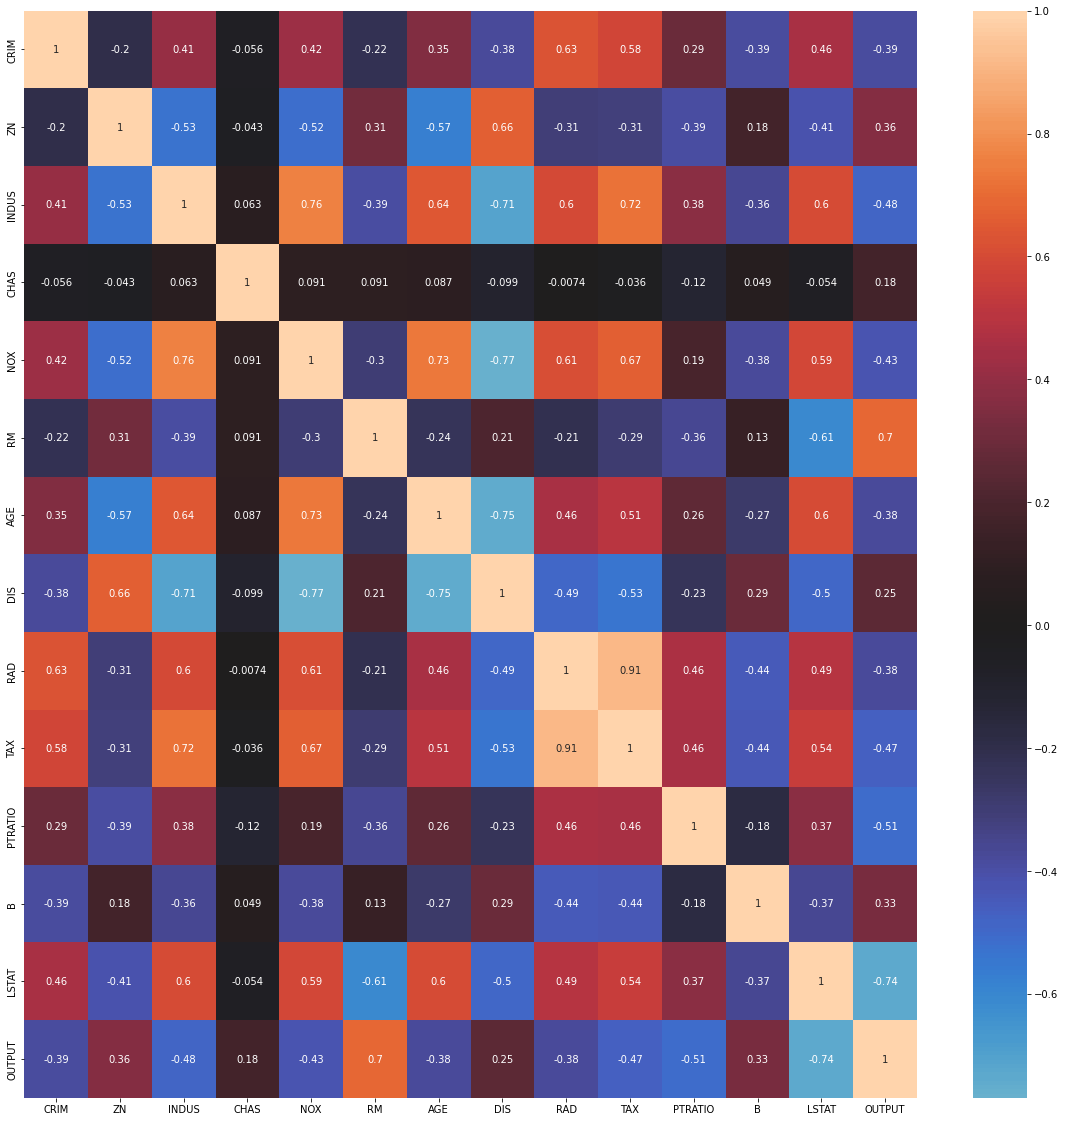

In [28]:
import seaborn as sns

corr = dataset.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot = True,  center=0)
plt.show()


To facilitate the work, we can print only the relevant column/row

In [29]:
print(corr['OUTPUT'])

CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
OUTPUT     1.000000
Name: OUTPUT, dtype: float64


A higher (absolute) value represents a stronger influence on the dependent variable and consequently, it should lead to a better performance of the linear regression. Therefore, we will filter the results to visualize only the two most relevant independent variables. Notice that the one with higher correlation (corr = 1) belongs to the 'OUTPUT' column itself.

In [30]:
print(dataset.corr().abs().nlargest(3, 'OUTPUT').index)
print(dataset.corr().abs().nlargest(3, 'OUTPUT').values[:, 13])

Index(['OUTPUT', 'LSTAT', 'RM'], dtype='object')
[1.         0.73766273 0.69535995]


Let's print the relationship between LSTAT and LABELS

Text(0, 0.5, 'OUTPUT')

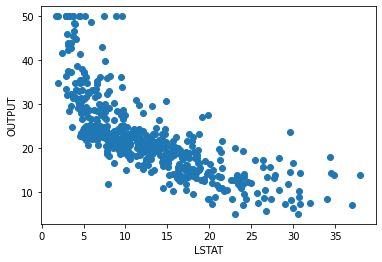

In [31]:
plt.scatter(dataset['LSTAT'], dataset['OUTPUT'], marker='o')
plt.xlabel('LSTAT')
plt.ylabel('OUTPUT')

From the previous figure we can deduce that there are a strong linear correlation between then so a linear regression model trained with this feature should lead to decend results

## 3 - Training the Linear Regression model with one variable
Firstly, we will create two new DataFrames to store exclusively the features under study, LSTAT

In [32]:
x = pd.DataFrame(dataset['LSTAT'])
Y = dataset['OUTPUT']

print(x.shape)
print(Y.shape)

(506, 1)
(506,)


Then, we need to split the new dataset into 70% for training and 30% for testing.
Note: for more information regarding the "random_state" parameter, visit https://scikit-learn.org/stable/glossary.html#term-random-state

In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size=0.3,
                                                    random_state=5)

print(x_train.shape)
print(Y_train.shape)
print(x_test.shape)
print(Y_test.shape)

(354, 1)
(354,)
(152, 1)
(152,)


Using the x_train and Y_train DataFrames, a Linear Regression model will be trained

In [34]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, Y_train)

print(model.coef_)
print(model.intercept_)

[-0.93779699]
34.2923731287397


Using the intercept and coefficient values we can represent the Linear model as:

$y = h_\theta(x) = \theta_0 + \theta_1x$

$h_\theta(x) = 34.2923 - 0.9378x$

Now, we will check the error when predicting the values from the test set

In [54]:
price_pred = model.predict(x_test)
print('R-squared: %.4f' % model.score(x_test,
                                      Y_test))


R-squared: 0.5170


If we print the model together with the test data, we can see that the model is quite accurate

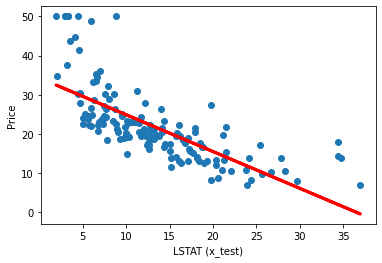

In [53]:
plt.scatter(x_test, Y_test)
plt.plot(x_test["LSTAT"].tolist(), price_pred, color='red', linewidth=3)
plt.xlabel('LSTAT (x_test)')
plt.ylabel('Price')
plt.show()

## 4 - Training the Linear Regression model with two variables
We can also train a Linear Regression model using two features (LSTAT and RM). In that case, the visual representation of the model is plane (3 dimensional space), instead of a line (2D)

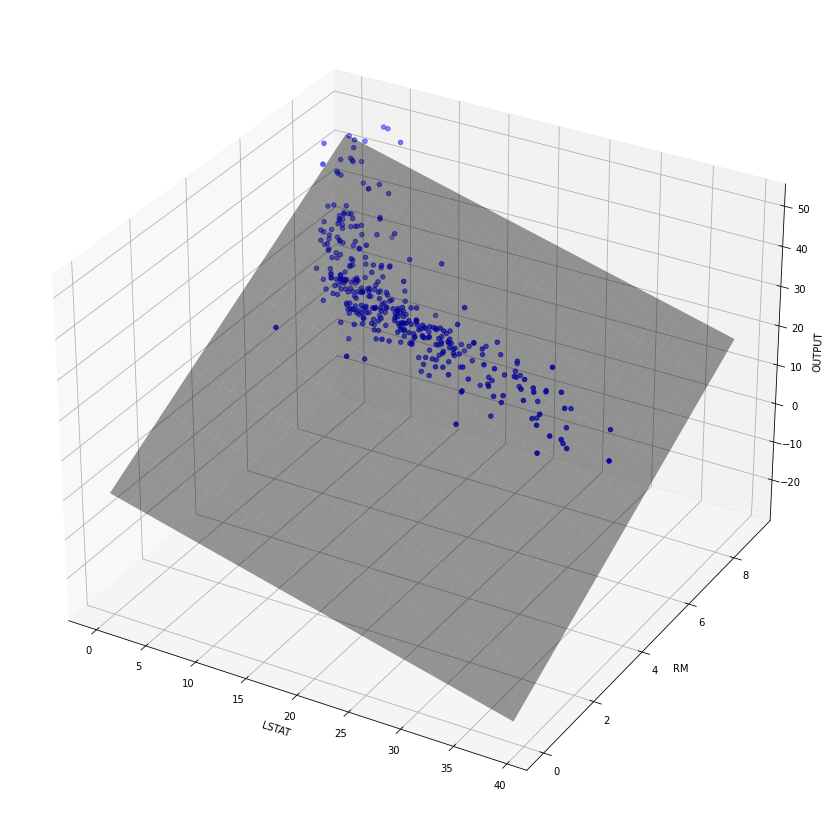

In [55]:
x = pd.DataFrame(np.c_[dataset['LSTAT'], dataset['RM']], columns = ['LSTAT','RM'])
Y = dataset['OUTPUT']

# Split the dataset into train and test sets
x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size=0.3,
                                                    random_state=5)

fig = plt.figure(figsize=(18,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_train['LSTAT'],
 x_train['RM'],
 Y_train,
 c='b')
ax.set_xlabel("LSTAT")
ax.set_ylabel("RM")
ax.set_zlabel("OUTPUT")

# Create a meshgrid of all the values for LSTAT and RM
x_surf = np.arange(0, 40, 1) # for LSTAT
y_surf = np.arange(0, 10, 1) # for RM
x_surf, y_surf = np.meshgrid(x_surf, y_surf)

model = LinearRegression()
model.fit(x_train, Y_train)

# Calculate z (LABELS) based on the model
z = lambda x_train,y_train: (model.intercept_ + model.coef_[0] * x_train + model.coef_[1] * y_train)

ax.plot_surface(x_surf, y_surf, z(x_surf,y_surf),
 rstride=1,
 cstride=1,
 color='None',
 alpha = 0.4)
plt.show()

When using 2 independent variables (Multivariate linear regression), we will have a hypothesis as follows:

$y = h_\theta(x) = \theta_0 + \theta_1x_1 + \theta_2x_2$

In [56]:
print(model.intercept_)
print(model.coef_)

0.38437936780346504
[-0.65957972  4.83197581]


$h_\theta(x) = 0.38 - 0.66x_1 + 4.83x_2$

Now, we can again check the error when predicting the values from the test set

In [57]:
price_pred = model.predict(x_test)
print('R-squared: %.4f' % model.score(x_test,
                                      Y_test))

R-squared: 0.6162
